In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_data=pd.read_csv(r"C:\Users\hp\Downloads\archive (1)\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
train_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
train_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:

train_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
train_data.select_dtypes(include='object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [8]:
len(train_data.select_dtypes(include='object').columns)

18

In [9]:
train_data.select_dtypes(include=['float64','int64']).columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [10]:
len(train_data.select_dtypes(include=['float64','int64']).columns)

3

In [11]:
train_data.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Encoding the categorical data


In [12]:
train_data.select_dtypes(include='object').columns


Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [13]:
train_data=train_data.drop(columns=['customerID','PaymentMethod'])

In [14]:
train_data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,Yes


In [15]:
train_data.select_dtypes(include='object').columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
train_data.shape

(7043, 19)

In [17]:
train_data['TotalCharges'] = pd.to_numeric(train_data['TotalCharges'], errors='coerce')
train_data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.50,No


In [18]:
train_data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
train_data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
train_data['tenure'].unique()


array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

# BARPLOT


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

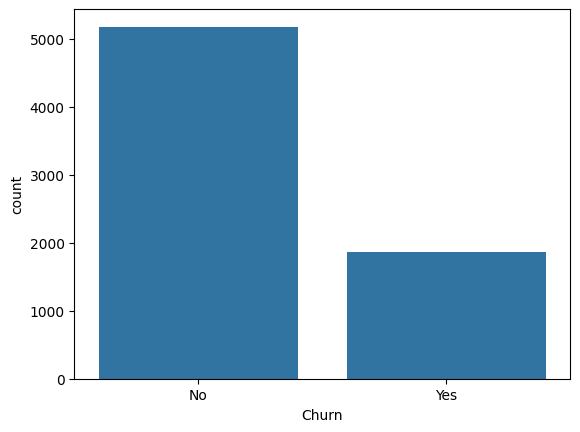

In [21]:
sns.countplot(x='Churn',data=train_data)
plt.plot

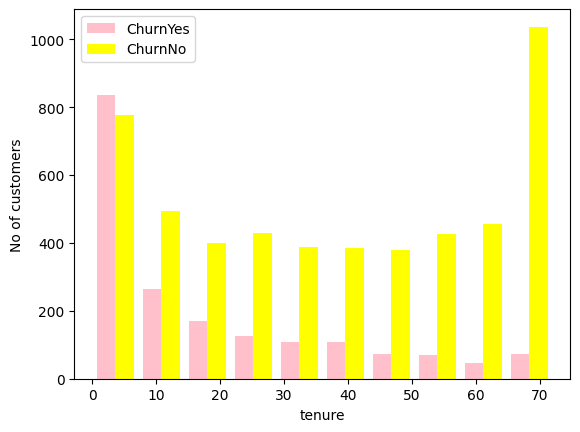

In [22]:
tenure_churn_yes=train_data[train_data.Churn=='Yes'].tenure
tenure_churn_no=train_data[train_data.Churn=='No'].tenure
plt.hist([tenure_churn_yes,tenure_churn_no], color=['pink','yellow'],label=['ChurnYes','ChurnNo'])
plt.xlabel('tenure')
plt.ylabel('No of customers')
plt.legend()

In [23]:
(train_data.Churn=='No').sum()

5174

In [24]:
(train_data.Churn=='Yes').sum()

1869

In [25]:
train_data.isnull().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [26]:
for column in train_data:
    print(f'{column} : {train_data[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [27]:
train_data.replace('No internet service','No',inplace=True)
train_data.replace('No phone service','No',inplace=True)
train_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,Yes


In [28]:
train_data['gender'].replace({'Male':0,'Female':1},inplace=True)
train_data['gender'].unique()
train_data['Dependents'].replace({'Yes':0,'No':1},inplace=True)
train_data['Dependents'].unique()
train_data['Partner'].replace({'Yes':0,'No':1},inplace=True)
train_data['Partner'].unique()

C:\Users\hp\AppData\Local\Temp\ipykernel_11536\4173714688.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['gender'].replace({'Male':0,'Female':1},inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_11536\4173714688.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['gen

array([0, 1], dtype=int64)

In [29]:
yes_no_columns=['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies', 'Contract', 'PaperlessBilling','Churn']
for col in yes_no_columns:
    train_data[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_11536\4232447433.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].replace({'Yes':1,'No':0},inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_11536\4232447433.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data[col].replace({

In [30]:
train_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,29.85,29.85,0
1,0,0,1,1,34,1,0,DSL,1,0,1,0,0,0,One year,0,56.95,1889.50,0
2,0,0,1,1,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,53.85,108.15,1
3,0,0,1,1,45,0,0,DSL,1,0,1,1,0,0,One year,0,42.30,1840.75,0
4,1,0,1,1,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,70.70,151.65,1


In [31]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_data[cols_to_scale]=scaler.fit_transform(train_data[cols_to_scale])

In [32]:
train_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,0.013889,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,0.115423,0.001275,0
1,0,0,1,1,0.472222,1,0,DSL,1,0,1,0,0,0,One year,0,0.385075,0.215867,0
2,0,0,1,1,0.027778,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,0.354229,0.010310,1
3,0,0,1,1,0.625000,0,0,DSL,1,0,1,1,0,0,One year,0,0.239303,0.210241,0
4,1,0,1,1,0.027778,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,0.521891,0.015330,1


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Define features and target variable
X = train_data.drop('Churn', axis=1)
y = train_data['Churn']

# Initialize LabelEncoder
labelencoder = LabelEncoder()

# Apply LabelEncoder to 'gender' and 'Partner' columns
# X['gender'] = labelencoder.fit_transform(X['gender'])
# X['Partner'] = labelencoder.fit_transform(X['Partner'])
# X['Dependents'] = labelencoder.fit_transform(X['Dependents'])
# Apply one-hot encoding to remaining categorical features
X_encoded=pd.get_dummies(X, columns=[
     'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
     'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies', 'Contract', 'PaperlessBilling'])

# Encode the target variable
labelencoder_y = LabelEncoder()
y_encoded = labelencoder_y.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.1, random_state=42)

# Diagnostic: Print shapes and class distributions
print(f"Shape of X_train: {X_train.shape}, Shape of X_test: {X_test.shape}")
print(f"Class distribution in y_train:\n{pd.Series(y_train).value_counts()}")
print(f"Class distribution in y_test:\n{pd.Series(y_test).value_counts()}")

# Check for data leakage using indices
X_train_indices = X_train.index
X_test_indices = X_test.index

common_indices = X_train_indices.intersection(X_test_indices)
if not common_indices.empty:
    print(f"Data leakage detected! Number of common indices: {len(common_indices)}")
else:
    print("No data leakage detected.")

# Initialize and train the RandomForestClassifier
random = RandomForestClassifier(n_estimators=10, max_depth=100, random_state=42)
random.fit(X_train, y_train)

# Make predictions
y_pred = random.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')





Shape of X_train: (6338, 31), Shape of X_test: (705, 31)
Class distribution in y_train:
0    4663
1    1675
Name: count, dtype: int64
Class distribution in y_test:
0    511
1    194
Name: count, dtype: int64
No data leakage detected.
Accuracy: 0.78


In [38]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Confusion Matrix:
[[470  41]
 [112  82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       511
           1       0.67      0.42      0.52       194

    accuracy                           0.78       705
   macro avg       0.74      0.67      0.69       705
weighted avg       0.77      0.78      0.77       705



In [39]:
from sklearn.model_selection import cross_val_score

# Cross-validation scores
cv_scores = cross_val_score(random, X_encoded, y_encoded, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {cv_scores.mean():.2f}')


Cross-Validation Scores: [0.78069553 0.78779276 0.76437189 0.78196023 0.78125   ]
Average Cross-Validation Score: 0.78


In [ ]:
len(X_train.columns)

In [40]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(31,),activation='relu'),
keras.layers.Dense(1,activation='sigmoid'),])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10)

Epoch 1/10


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7182 - loss: 0.6430
Epoch 2/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7353 - loss: 0.6463
Epoch 3/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7411 - loss: 0.6193
Epoch 4/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7341 - loss: 0.6056
Epoch 5/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7404 - loss: 0.5912
Epoch 6/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7248 - loss: 0.5947
Epoch 7/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7272 - loss: 0.5895
Epoch 8/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7346 - loss: 0.5813
Epoch 9/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7374 - loss: 0.5775
Epoch 10/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7384 - loss: 0.5758
